# Example walkthrough of PyARXaaS and ARXaaS analyzation and anonymization

### Import pyaaas modules

In [1]:
from pyaaas import ARXaaS
from pyaaas.privacy_models import KAnonymity
from pyaaas import AttributeType
from pyaaas import Dataset
import pandas as pd

ModuleNotFoundError: No module named 'pyaaas'

### Create service connection

In [2]:
arxaas = ARXaaS("http://localhost:8080/") # connecting to online service

NameError: name 'ARXaaS' is not defined

### Import dataset

In [5]:
data_df = pd.read_csv("../../data/dummy-dataset-260219.csv", sep=";")

In [6]:
data_df

,Dummy_tag,ID,Navn,Alder,Sivilstatus,Barn,Innsatsgruppe,Innvandrerbakgrunn,Ledighetsstatus,Utdanning,Ytelse,Medisinsk forhold
0,dummy_data,PY827,Eirik,47,Ukjent,1,Situasjonsbestemt innsats,Togo,Delvis ledig,Høyere utd inntil 4 år,Tiltakspenger,Ingen
1,dummy_data,CX244,Ella,30,Gift,2,Varig tilpasset,Surinam,Ordinær tiltaksdeltaker,Grunnskole,Dagpenger,Ingen
2,dummy_data,ZE697,Solveig,37,Ukjent,1,Standard innsats,Malta,Delvis ledig,Grunnskole,Dagpenger,Ingen
3,dummy_data,AR215,Eirik,52,Ugift,1,Standard innsats,Norge,Andre arbeidssøkende,Høyere utd inntil 4 år,Uføretrygd,Ingen
4,dummy_data,CZ546,Heidi,37,Ukjent,3,Spesielt tilpasset,Surinam,Andre arbeidssøkende,Høyere utd over 4 år,Dagpenger,Ingen
5,dummy_data,XF859,Nora,30,Gift,2,Spesielt tilpasset,Malta,Andre arbeidssøkende,VGS,Uføretrygd,Ingen
6,dummy_data,LN430,Sara,42,Enke,2,Situasjonsbestemt innsats,Norge,Andre arbeidssøkende,Høyere utd inntil 4 år,Tiltakspenger,Ingen
7,dummy_data,UX876,Johan,39,Enke,1,Varig tilpasset,Norge,Helt ledig,VGS,Tiltakspenger,Ingen
8,dummy_data,TO107,Tobias,37,Enke,2,Standard innsats,Norge,Delvis ledig,Grunnskole,Dagpenger,Ingen
9,dummy_data,OY439,Ella,42,Gift,2,Standard innsats,Malta,Helt ledig,Ukjent,Tiltakspenger,Ingen


### Create pyaaas.Dataset object

In [7]:
dataset = Dataset.from_pandas(data_df)

### Set the AttributeType for the dataset fields

In [8]:
dataset.set_attribute_type(AttributeType.IDENTIFYING, 'ID', 'Navn', 'Medisinsk forhold')

In [9]:
dataset.set_attribute_type(AttributeType.INSENSITIVE,
                       'Dummy_tag',
                        'Sivilstatus',
                        'Barn',
                        'Utdanning')

### Create Risk Profile
Various privacy risks can be analyzed. These include re-identification risks for the prosecutor, journalist and marketer attacker models as well as risks derived from population uniqueness, which can be estimated with different statistical methods.

In [10]:
risk_profile = arxaas.risk_profile(dataset)

In [11]:
risk_profile.re_identification_risk_dataframe()

,average_prosecutor_risk,estimated_journalist_risk,estimated_marketer_risk,estimated_prosecutor_risk,highest_journalist_risk,highest_prosecutor_risk,lowest_risk,population_uniques,records_affected_by_highest_journalist_risk,records_affected_by_highest_prosecutor_risk,records_affected_by_lowest_risk,sample_uniques
0,0.6212,1.0,0.6212,1.0,1.0,1.0,0.066667,0.042359,0.4452,0.4452,0.003,0.4452


In [12]:
risk_profile.distribution_of_risk_dataframe().head(10)

,interval,recordsWithMaxmalRiskWithinInterval,recordsWithRiskWithinInteval
0,"]50,100]",1.0000,0.4452
1,"]33.4,50]",0.5548,0.1924
2,"]25,33.4]",0.3624,0.1032
3,"]20,25]",0.2592,0.0744
4,"]16.7,20]",0.1848,0.0410
5,"]14.3,16.7]",0.1438,0.0372
6,"]12.5,14.3]",0.1066,0.0308
7,"]10,12.5]",0.0758,0.0452
8,"]9,10]",0.0306,0.0122
9,"]8,9]",0.0184,0.0072


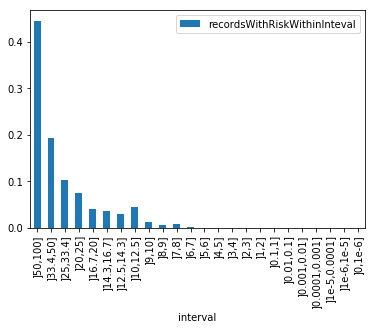

In [56]:
risk_profile.distribution_of_risk_dataframe().plot(kind="bar", x="interval", y="recordsWithRiskWithinInteval");

#### Raw profile data

In [13]:
risk_profile.re_identification_risk

{'estimated_journalist_risk': 1.0,
 'records_affected_by_highest_prosecutor_risk': 0.4452,
 'sample_uniques': 0.4452,
 'lowest_risk': 0.06666666666666667,
 'estimated_prosecutor_risk': 1.0,
 'highest_journalist_risk': 1.0,
 'records_affected_by_lowest_risk': 0.003,
 'average_prosecutor_risk': 0.6212000000000001,
 'estimated_marketer_risk': 0.6212000000000001,
 'highest_prosecutor_risk': 1.0,
 'records_affected_by_highest_journalist_risk': 0.4452,
 'population_uniques': 0.042358627131831195}

## Anonymize
If the dataset is not anonymous enough anononymization can be performed using the service

### Create Privacy Models
This well-known privacy model aims at protecting datasets from re-identification in the prosecutor model. A dataset is k-anonymous if each record cannot be distinguished from at least k-1 other records regarding the quasi-identifiers. Each group of indistinguishable records forms a so-called equivalence class.

In [14]:
kanon = KAnonymity(4)

### Create generalization hierarchies

#### Order based hierarchy

In [15]:
from pyaaas.hierarchy import OrderHierarchyBuilder

In [16]:
def perserve_order_unique_list(alist: list):
    tmp_dict= {item: None for item in alist}
    return list(tmp_dict.keys())

In [17]:
unique_ytelser = perserve_order_unique_list(data_df["Ytelse"].tolist())
unique_ytelser[4], unique_ytelser[3] = unique_ytelser[3], unique_ytelser[4]
unique_ytelser[3], unique_ytelser[2] = unique_ytelser[2], unique_ytelser[3]
ordered_unique_ytelser = unique_ytelser
ordered_unique_ytelser

['Tiltakspenger',
 'Dagpenger',
 'Arbeidsavklaringspenger',
 'Uføretrygd',
 'Sykepenger']

In [18]:
order_based = OrderHierarchyBuilder()
order_based.level(0).add_group(3, "arbeids-relatert-ytelse")
order_based.level(0).add_group(2, "sykdom-relatert-ytelse")

Level(level=0, groups={Group(grouping=3, label=arbeids-relatert-ytelse): None, Group(grouping=2, label=sykdom-relatert-ytelse): None})

In [19]:
ytelse_hierarchy = arxaas.hierarchy(order_based, ordered_unique_ytelser)
ytelse_hierarchy

[['Tiltakspenger', 'arbeids-relatert-ytelse', '*'],
 ['Dagpenger', 'arbeids-relatert-ytelse', '*'],
 ['Arbeidsavklaringspenger', 'arbeids-relatert-ytelse', '*'],
 ['Uføretrygd', 'sykdom-relatert-ytelse', '*'],
 ['Sykepenger', 'sykdom-relatert-ytelse', '*']]

#### Inteval based hierarchy

In [21]:
from pyaaas.hierarchy import IntervalHierarchyBuilder

In [22]:
ages = data_df["Alder"].tolist()
ages[:15] # 15 first items

[47, 30, 37, 52, 37, 30, 42, 39, 37, 42, 41, 33, 42, 36, 35]

In [23]:
interval_based = IntervalHierarchyBuilder()
interval_based.add_interval(0, 18)
interval_based.add_interval(18, 50)
interval_based.add_interval(50, 80)
interval_based.add_interval(80, 120)

# group intervals
interval_based.level(0).add_group(2)
interval_based.level(0).add_group(2)

Level(level=0, groups={Group(grouping=2, label=None): None, Group(grouping=2, label=None): None})

In [24]:
age_hierarchy = arxaas.hierarchy(interval_based, ages)
age_hierarchy[:10]

[['47', '[18, 50[', '[0, 50[', '*'],
 ['30', '[18, 50[', '[0, 50[', '*'],
 ['37', '[18, 50[', '[0, 50[', '*'],
 ['52', '[50, 80[', '[50, 120[', '*'],
 ['37', '[18, 50[', '[0, 50[', '*'],
 ['30', '[18, 50[', '[0, 50[', '*'],
 ['42', '[18, 50[', '[0, 50[', '*'],
 ['39', '[18, 50[', '[0, 50[', '*'],
 ['37', '[18, 50[', '[0, 50[', '*'],
 ['42', '[18, 50[', '[0, 50[', '*']]

### Set generalization hierarchies from file
Note that if the hierarchy does not have a header row in the csv file, please set header=None in read_csv() or the first row will be interpreted as a header and ARXaaS will throw an exception for the missing hierarchy data.

In [25]:
innsatsgruppe_hierarchy = pd.read_csv("../../hierarchies/innsatsgruppe_hierarchy.csv", sep=";", header=None)
innvandrerbakgrunn_hierarchy = pd.read_csv("../../hierarchies/innvandrerbakgrunn_hierarchy.csv", sep=";", header=None)
ledighetsstatus_hierarchy = pd.read_csv("../../hierarchies/ledighetsstatus_hierarchy.csv", sep=";", header=None)

In [26]:
innsatsgruppe_hierarchy

,0,1,2
0,Situasjonsbestemt innsats,Spesielt tilpasset,*
1,Spesielt tilpasset,Spesielt tilpasset,*
2,Standard innsats,Varig tilpasset,*
3,Varig tilpasset,Varig tilpasset,*


In [27]:
dataset.set_hierarchy('Ytelse', ytelse_hierarchy)
dataset.set_hierarchy('Alder', age_hierarchy)
dataset.set_hierarchy("Innsatsgruppe", innsatsgruppe_hierarchy)
dataset.set_hierarchy("Innvandrerbakgrunn", innvandrerbakgrunn_hierarchy)
dataset.set_hierarchy("Ledighetsstatus", ledighetsstatus_hierarchy)

### With the hierarchies set we can preform a anonymization

In [30]:
anon_result = arxaas.anonymize(dataset, [kanon])

In [31]:
anon_result.dataset.to_dataframe()

,Dummy_tag,ID,Navn,Alder,Sivilstatus,Barn,Innsatsgruppe,Innvandrerbakgrunn,Ledighetsstatus,Utdanning,Ytelse,Medisinsk forhold
0,dummy_data,*,*,*,Ukjent,1,Situasjonsbestemt innsats,*,Delvis ledig,Høyere utd inntil 4 år,Tiltakspenger,*
1,dummy_data,*,*,*,Gift,2,Varig tilpasset,*,Ordinær tiltaksdeltaker,Grunnskole,Dagpenger,*
2,dummy_data,*,*,*,Ukjent,1,Standard innsats,*,Delvis ledig,Grunnskole,Dagpenger,*
3,dummy_data,*,*,*,Ugift,1,Standard innsats,*,Andre arbeidssøkende,Høyere utd inntil 4 år,Uføretrygd,*
4,dummy_data,*,*,*,Ukjent,3,Spesielt tilpasset,*,Andre arbeidssøkende,Høyere utd over 4 år,Dagpenger,*
5,dummy_data,*,*,*,Gift,2,Spesielt tilpasset,*,Andre arbeidssøkende,VGS,Uføretrygd,*
6,dummy_data,*,*,*,Enke,2,Situasjonsbestemt innsats,*,Andre arbeidssøkende,Høyere utd inntil 4 år,Tiltakspenger,*
7,dummy_data,*,*,*,Enke,1,Varig tilpasset,*,Helt ledig,VGS,Tiltakspenger,*
8,dummy_data,*,*,*,Enke,2,Standard innsats,*,Delvis ledig,Grunnskole,Dagpenger,*
9,dummy_data,*,*,*,Gift,2,Standard innsats,*,Helt ledig,Ukjent,Tiltakspenger,*


###  Risk Profile for the anonymized dataset

In [32]:
anon_rp = anon_result.risk_profile

In [35]:
anon_rp.re_identification_risk

{'estimated_journalist_risk': 0.16666666666666666,
 'records_affected_by_highest_prosecutor_risk': 0.0012,
 'sample_uniques': 0.0,
 'lowest_risk': 0.0025974025974025974,
 'estimated_prosecutor_risk': 0.16666666666666666,
 'highest_journalist_risk': 0.16666666666666666,
 'records_affected_by_lowest_risk': 0.5137999999999999,
 'average_prosecutor_risk': 0.016,
 'estimated_marketer_risk': 0.016,
 'highest_prosecutor_risk': 0.16666666666666666,
 'records_affected_by_highest_journalist_risk': 0.0012,
 'population_uniques': 0.0}

In [36]:
anon_rp.distribution_of_risk_dataframe().head(10)


,interval,recordsWithMaxmalRiskWithinInterval,recordsWithRiskWithinInteval
0,"]50,100]",1.0000,0.0000
1,"]33.4,50]",1.0000,0.0000
2,"]25,33.4]",1.0000,0.0000
3,"]20,25]",1.0000,0.0000
4,"]16.7,20]",1.0000,0.0000
5,"]14.3,16.7]",1.0000,0.0012
6,"]12.5,14.3]",0.9988,0.0000
7,"]10,12.5]",0.9988,0.0018
8,"]9,10]",0.9970,0.0040
9,"]8,9]",0.9930,0.0024


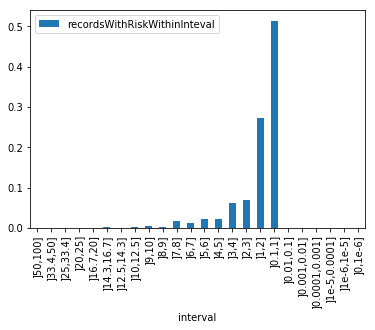

In [55]:
anon_rp.distribution_of_risk_dataframe().plot(kind="bar", x="interval", y="recordsWithRiskWithinInteval");

### Anonymization Metrics

In [37]:
metrics = anon_result.anonymization_metrics

### Information about the levels in the hierarchies used

In [38]:
metrics.attribute_generalization

[{'name': 'Alder',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 3},
 {'name': 'Innsatsgruppe',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 0},
 {'name': 'Innvandrerbakgrunn',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 2},
 {'name': 'Ledighetsstatus',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 0},
 {'name': 'Ytelse',
  'type': 'QUASI_IDENTIFYING_ATTRIBUTE',
  'generalizationLevel': 0}]

### Information about which configuration where used in the Privacy Models

In [39]:
metrics.privacy_models

[{'monotonicWithGeneralization': True,
  'k': 4,
  'localRecodingSupported': True,
  'riskThresholdJournalist': 0.25,
  'riskThresholdMarketer': 0.25,
  'riskThresholdProsecutor': 0.25,
  'requirements': 1,
  'minimalClassSizeAvailable': True,
  'minimalClassSize': 4,
  'sampleBased': False,
  'subset': None,
  'populationModel': None,
  'subsetAvailable': False,
  'dataSubset': None,
  'monotonicWithSuppression': True}]

In [40]:
anon_rp.re_identification_risk_dataframe()

,average_prosecutor_risk,estimated_journalist_risk,estimated_marketer_risk,estimated_prosecutor_risk,highest_journalist_risk,highest_prosecutor_risk,lowest_risk,population_uniques,records_affected_by_highest_journalist_risk,records_affected_by_highest_prosecutor_risk,records_affected_by_lowest_risk,sample_uniques
0,0.016,0.166667,0.016,0.166667,0.166667,0.166667,0.002597,0.0,0.0012,0.0012,0.5138,0.0


## Comparing re-identification risks before and after anonymziation

In [41]:
anon_risk = anon_rp.re_identification_risk_dataframe()
anon_risk = anon_risk[['estimated_prosecutor_risk', 'highest_prosecutor_risk', 'lowest_risk']].copy()
before_anon_risk = risk_profile.re_identification_risk_dataframe()
before_anon_risk = before_anon_risk[['estimated_prosecutor_risk', 'highest_prosecutor_risk', 'lowest_risk']].copy()

In [42]:
anon_risk["from"] = "after"

In [43]:
before_anon_risk["from"] = "before"

In [44]:
df_risks = pd.concat([anon_risk, before_anon_risk])

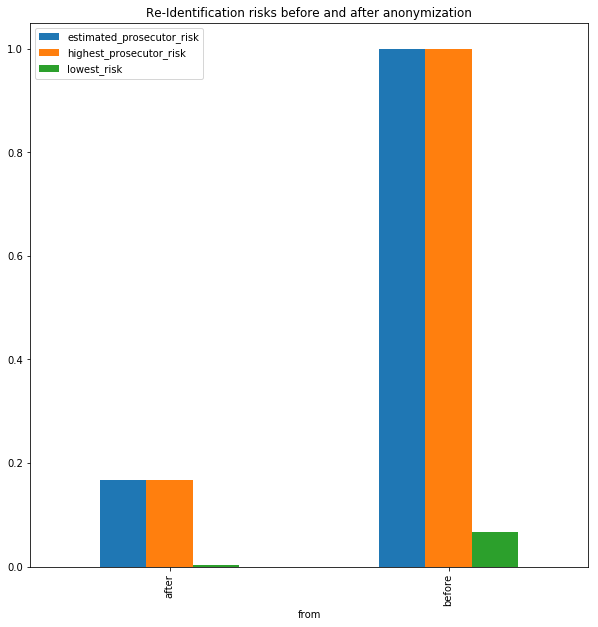

In [47]:
df_risks.plot(kind="bar",x="from", title="Re-Identification risks before and after anonymization", figsize=(10,10));